<a href="https://colab.research.google.com/github/anazantoro/Model-PLP/blob/main/V3_Notebook_Predict_Personalized_Student_Learning_Category_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import sys
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Dependencies Version

In [ ]:
print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("TensorFlow Version:", tf.__version__)

Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
NumPy Version: 2.0.2
Pandas Version: 2.2.2
Scikit-learn Version: 1.6.1
TensorFlow Version: 2.18.0


# Load Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/anazantoro/Project-PersonalizedLearningPath/refs/heads/main/Dataset/students_cleaned_with_label.csv")

# Understanding

In [ ]:
data.head()

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network,Label
0,1.00,0.60,0.77,0.89,0.75,0.63,0.79,UI/UX
1,0.71,0.73,0.75,0.78,0.68,0.81,0.90,Computer Network
2,0.63,0.76,0.80,0.63,0.88,0.92,0.61,Quality Assurance
3,1.00,0.92,0.60,0.94,0.77,0.77,0.96,UI/UX
4,0.95,0.81,0.86,0.72,0.69,0.93,0.68,UI/UX


In [ ]:
data.describe()

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.809420,0.803870,0.807000,0.802240,0.796430,0.802410,0.809170
std,0.115189,0.111211,0.109817,0.116718,0.111865,0.116395,0.110214
min,0.560000,0.550000,0.560000,0.560000,0.560000,0.550000,0.570000
25%,0.720000,0.710000,0.720000,0.700000,0.700000,0.700000,0.720000
50%,0.820000,0.810000,0.820000,0.810000,0.800000,0.810000,0.820000
75%,0.910000,0.892500,0.890000,0.900000,0.880000,0.900000,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(data.isna().sum() / len(data) * 100, columns=['Null Ratio %'])

,Null Ratio %
UI/UX,0.0
Programming,0.0
Operational,0.0
Data Science,0.0
Cybersecurity,0.0
Quality Assurance,0.0
Computer Network,0.0
Label,0.0


In [ ]:
data[data.duplicated()]

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network,Label


# Pre-processing

In [ ]:
X = data.iloc[:, :-1].values
y = np.argmax(X, axis=1)

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_sparse = y_train_smote
y_test_sparse = y_test

In [ ]:
X_train_reshaped.shape

(833, 1, 7)

# Modelling

In [ ]:
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(1, 7), go_backwards=True),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dense(7, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_reshaped,
    y_train_sparse,
    epochs=100,
    batch_size=128,
    validation_data=(X_test_reshaped, y_test_sparse)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.1630 - loss: 1.9865 - val_accuracy: 0.3067 - val_loss: 1.8767
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2177 - loss: 1.8951 - val_accuracy: 0.3900 - val_loss: 1.8218
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2338 - loss: 1.8708 - val_accuracy: 0.4167 - val_loss: 1.7774
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3126 - loss: 1.8022 - val_accuracy: 0.4833 - val_loss: 1.7272
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3725 - loss: 1.7521 - val_accuracy: 0.5933 - val_loss: 1.6769
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3833 - loss: 1.7097 - val_accuracy: 0.5900 - val_loss: 1.6298
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4347 - loss: 1.6504 - val_accuracy: 0.6267 - val_loss: 1.5824
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4610 - loss: 1.6103 - val_accuracy: 0.6233 - val_loss

# Training

# Evaluation

In [ ]:
# categories = ['UI/UX', 'Programming', 'Operational', 'Data Science', 'Cybersecurity',
#               'Quality Assurance', 'Computer Network', 'Project Management',
#               'Product Manager', 'Entrepreneur', 'Business/Commerce/Ideation']

In [ ]:
categories = ['UI/UX', 'Programming', 'Operational', 'Data Science', 'Cybersecurity',
              'Quality Assurance', 'Computer Network']

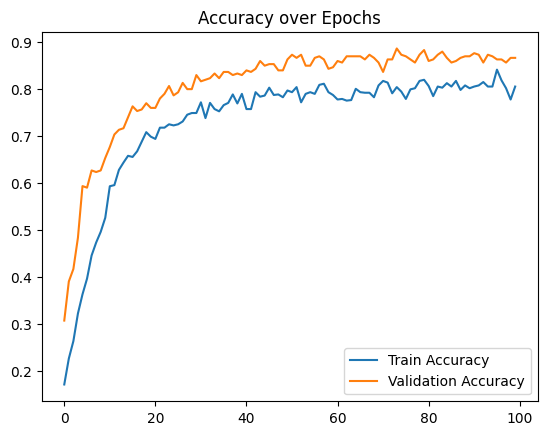

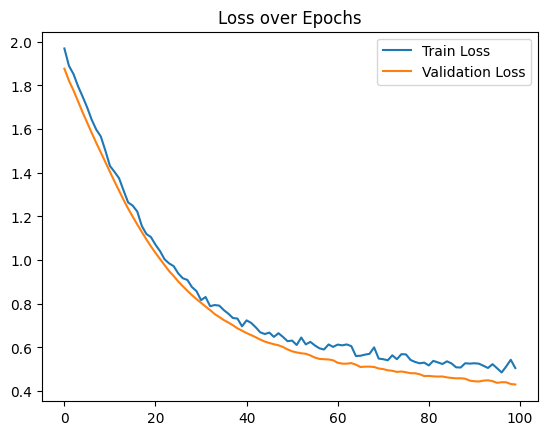

In [ ]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


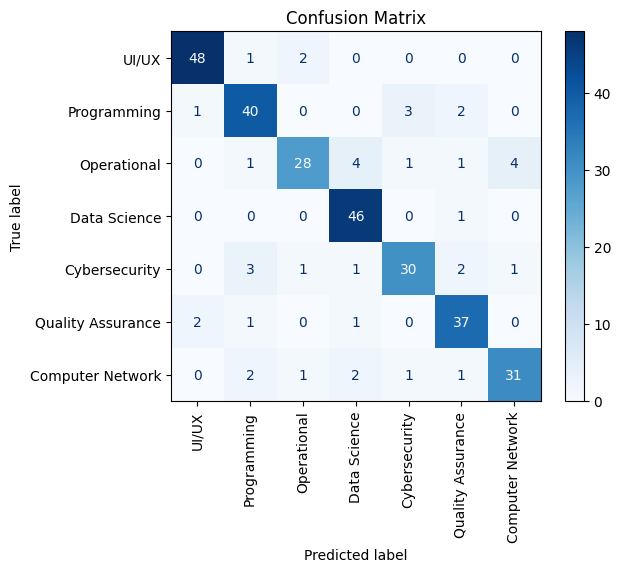

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,759 (81.09 KB)

 Trainable params: 6,919 (27.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,840 (54.07 KB)

# Testing Model

In [ ]:
def predict_and_show(new_data, model, categories, top_k=3):
    new_data = np.expand_dims(new_data, axis=1)
    new_data_prediction = model.predict(new_data)[0]

    threshold = np.mean(new_data_prediction)
    print(f"\nDynamic Threshold (from prediction mean): {threshold:.4f}")

    above_threshold = [(i, prob) for i, prob in enumerate(new_data_prediction) if prob > threshold]

    if above_threshold:
        print("\nPredictions above threshold:")
        above_threshold.sort(key=lambda x: x[1], reverse=True)
        for idx, prob in above_threshold[:top_k]:
            print(f"{categories[idx]}: {prob:.4f}")
    else:
        top_index = new_data_prediction.argmax()
        print("\nNo prediction above threshold. Fallback to top-1:")
        print(f"{categories[top_index]}: {new_data_prediction[top_index]:.4f}")

    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, new_data_prediction, color='skyblue')
    for i, bar in enumerate(bars):
        if new_data_prediction[i] > threshold:
            bar.set_color('green')
        elif new_data_prediction[i] == new_data_prediction.max() and not above_threshold:
            bar.set_color('orange')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')
    plt.title("Prediction Probabilities")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

def manual_input():
    scores = []
    print("Masukkan skor untuk masing-masing kategori (0.0 - 1.0):")
    for category in categories:
        while True:
            try:
                value = float(input(f"{category}: "))
                if 0.0 <= value <= 1.0:
                    scores.append(value)
                    break
                else:
                    print("Masukkan angka antara 0.0 sampai 1.0!")
            except ValueError:
                print("Masukkan angka yang valid!")
    return np.array([scores])

Masukkan skor untuk masing-masing kategori (0.0 - 1.0):
UI/UX: 0.5
Programming: 0.7
Operational: 0.4
Data Science: 0.6
Cybersecurity: 0.5
Quality Assurance: 0.7
Computer Network: 0.4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Dynamic Threshold (from prediction mean): 0.4639

Predictions above threshold:
Programming: 0.9410
Quality Assurance: 0.9263
Data Science: 0.6292


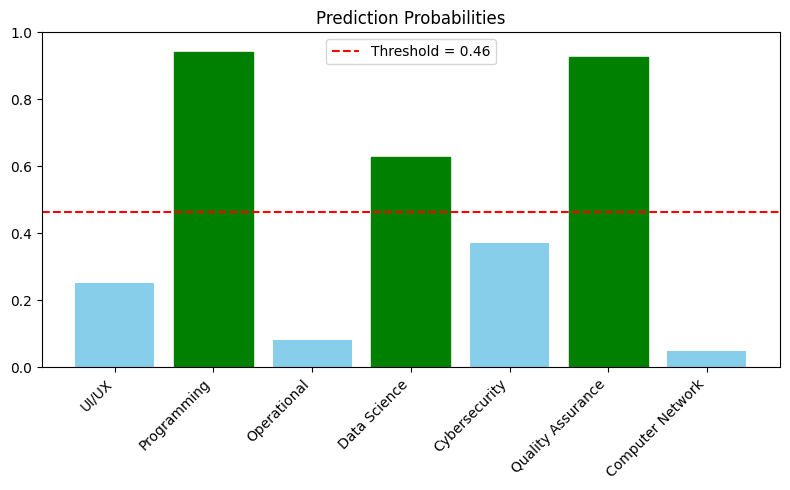

In [ ]:
def predict_and_show_manual_input(model):
    user_input = manual_input()
    predict_and_show(user_input, model, categories)

predict_and_show_manual_input(model)

# Save Model

In [ ]:
model.save("model.h5")

In [ ]:
import pickle

# Simpan scaler ke file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)